In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [3]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [4]:
hrtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [8]:
print(hrtrain.avg_training_score.skew())
print(hrtrain.avg_training_score.kurt())

0.45190808551707995
-1.049649301934108


<AxesSubplot:ylabel='Frequency'>

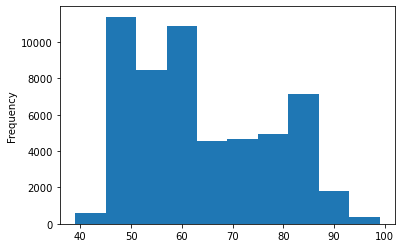

In [9]:
# Create Histogram, Boxplot & Density Curve - avg_training_score
hrtrain.avg_training_score.plot(kind='hist')

<AxesSubplot:>

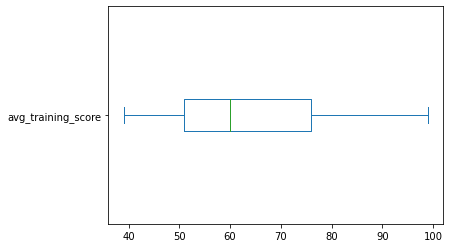

In [10]:
hrtrain.avg_training_score.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

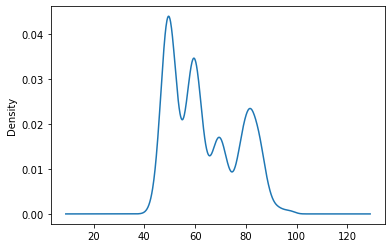

In [11]:
hrtrain.avg_training_score.plot(kind='density')

In [12]:
hrtrain[['age','avg_training_score']].cov()

,age,avg_training_score
age,58.678192,-4.955455
avg_training_score,-4.955455,178.798603


In [13]:
hrtrain[['age','avg_training_score']].corr()

,age,avg_training_score
age,1.00000,-0.04838
avg_training_score,-0.04838,1.00000


<AxesSubplot:xlabel='age', ylabel='avg_training_score'>

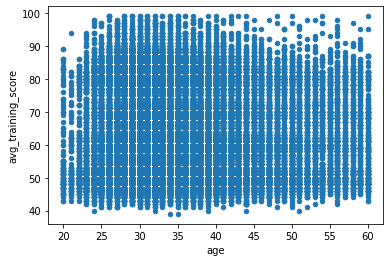

In [14]:
hrtrain.plot(x='age',y='avg_training_score',kind='scatter')

In [15]:
hrtrain.tail(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [16]:
# Non Numeric Categorical Data - Frequency Counts and Cross Tabulation
# Cross tabulation is frequency table of 2 non numeric categorical variables

In [17]:
# How many types of education are there?
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [18]:
# Frequency counts of variable gender
hrtrain.gender.value_counts(dropna=False)

m    38496
f    16312
Name: gender, dtype: int64

In [19]:
# Frequency Count of department
hrtrain.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [20]:
# Departmentwise Gender? # Cross tabulation
pd.crosstab(hrtrain.department,hrtrain.gender)

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


In [21]:
# Departmentwise education?
pd.crosstab(hrtrain.department,hrtrain.education)

education,Bachelor's,Below Secondary,Master's & above
department,,,
Analytics,3978,0,1037
Finance,1895,106,499
HR,1525,128,733
Legal,814,65,156
Operations,7781,176,3165
Procurement,4393,129,2544
R&D,542,0,429
Sales & Marketing,11099,0,4166
Technology,4642,201,2196


In [22]:
# Frequency count of previous_year_rating
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [23]:
# Cross Tabulation of previous_year_rating and gender
pd.crosstab(hrtrain.previous_year_rating,hrtrain.gender)

gender,f,m
previous_year_rating,,
1.0,1661,4562
2.0,1221,3004
3.0,5633,12985
4.0,3037,6840
5.0,3602,8139


In [24]:
# Who performed well in terms of avg_training_score, male or female?
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()
# leftside of groupby is Numerical
# rightside within brackets of groupby is Categorical(Non Numeric)
# Statistical Function must be speciifed median, std, skew, kurt, etc.

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [25]:
# What is the median age of male and female employees?
hrtrain.age.groupby(hrtrain.gender).median()

gender
f    33.0
m    33.0
Name: age, dtype: float64

In [26]:
# What is the Average avg_training_score for different previous_year_rating?
hrtrain.avg_training_score.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    60.064760
2.0    61.924024
3.0    64.197819
4.0    64.119773
5.0    63.781364
Name: avg_training_score, dtype: float64

In [27]:
# What is the Average length_of_service of different previous_year_rating?
hrtrain.length_of_service.groupby(hrtrain.previous_year_rating).mean()

previous_year_rating
1.0    6.223686
2.0    6.241893
3.0    6.309324
4.0    6.193986
5.0    6.269142
Name: length_of_service, dtype: float64

In [28]:
# Dependent Variable - is_promoted (0/1 No/Yes)
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [29]:
# What is the Average avg_training_score of is_promoted 0 & 1?
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [30]:
# What is the Average length_of_service of is_promoted 0 & 1?
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [31]:
# 2 Categorical Variables in groupby function
# What is the Average avg_training_score of is_promoted and gender?
hrtrain.avg_training_score.groupby([hrtrain.is_promoted,
                                   hrtrain.gender]).mean()

is_promoted  gender
0            f         63.089256
             m         62.461963
1            f         71.991820
             m         71.019681
Name: avg_training_score, dtype: float64

In [32]:
# What is the Average length_of_service of awards_won? and is_promoted?
hrtrain.length_of_service.groupby([hrtrain['awards_won?'],
                                  hrtrain.is_promoted]).mean()

awards_won?  is_promoted
0            0              5.896963
             1              5.828912
1            0              4.658228
             1              4.889088
Name: length_of_service, dtype: float64

In [33]:
# What is the Average no_of_trainings for different recruitment_channel?
hrtrain.no_of_trainings.groupby(hrtrain.recruitment_channel).median()

recruitment_channel
other       1.0
referred    1.0
sourcing    1.0
Name: no_of_trainings, dtype: float64

In [34]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [35]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender,normalize=True)

gender,f,m
is_promoted,,
0,0.270855,0.643975
1,0.026766,0.058404


In [36]:
# proprtion of females and males promoted to respective population
print("The percentage of females promoted:",np.round((1467/16312)*100))
print("The percentage of males promoted:", np.round((3201/38496)*100))

The percentage of females promoted: 9.0
The percentage of males promoted: 8.0


In [37]:
# Proportion of Promotions in Departments
np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,
           normalize='index'),decimals=2)*100

is_promoted,0,1
department,,
Analytics,90.0,10.0
Finance,92.0,8.0
HR,94.0,6.0
Legal,95.0,5.0
Operations,91.0,9.0
Procurement,90.0,10.0
R&D,93.0,7.0
Sales & Marketing,93.0,7.0
Technology,89.0,11.0


<AxesSubplot:xlabel='department'>

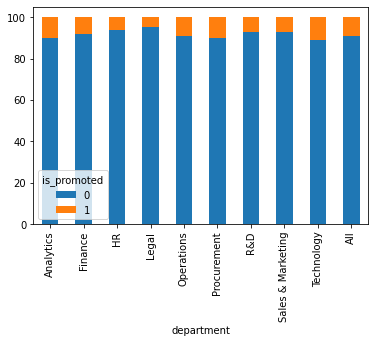

In [38]:
(np.round(pd.crosstab(hrtrain.department,hrtrain.is_promoted,margins=True,
           normalize='index'),decimals=2)*100).plot(kind='bar',
                                                   stacked=True)

In [39]:
hrtrain.avg_training_score.describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [40]:
pd.cut(np.array(hrtrain.avg_training_score),3,
       labels=['Bad','Average','Good']).value_counts()

Bad        25868
Average    18416
Good       10524
dtype: int64

In [41]:
bins=[29,39,49,59,69,79,89,99]
hrtrain['bins']=pd.cut(hrtrain.avg_training_score,bins)

In [42]:
hrtrain.bins.value_counts().sort_index()

(29, 39]        2
(39, 49]     9285
(49, 59]    16581
(59, 69]    11073
(69, 79]     7343
(79, 89]     9760
(89, 99]      764
Name: bins, dtype: int64

In [43]:
bins=[0,5,10,15,20,25,30,35,40]
hrtrain['servicebins']=pd.cut(hrtrain.length_of_service,bins)

In [44]:
hrtrain.servicebins.value_counts().sort_index()

(0, 5]      30932
(5, 10]     17990
(10, 15]     3539
(15, 20]     1829
(20, 25]      325
(25, 30]      149
(30, 35]       43
(35, 40]        1
Name: servicebins, dtype: int64

In [45]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'bins', 'servicebins'],
      dtype='object')

In [46]:
hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].cov()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,0.371203,-0.379329,-0.148832,0.346378
age,-0.379329,58.678192,21.468711,-4.955455
length_of_service,-0.148832,21.468711,18.191028,-2.174143
avg_training_score,0.346378,-4.955455,-2.174143,178.798603


In [47]:
hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].corr()

,no_of_trainings,age,length_of_service,avg_training_score
no_of_trainings,1.000000,-0.081278,-0.057275,0.042517
age,-0.081278,1.000000,0.657111,-0.048380
length_of_service,-0.057275,0.657111,1.000000,-0.038122
avg_training_score,0.042517,-0.048380,-0.038122,1.000000


In [48]:
import seaborn as sns

<AxesSubplot:>

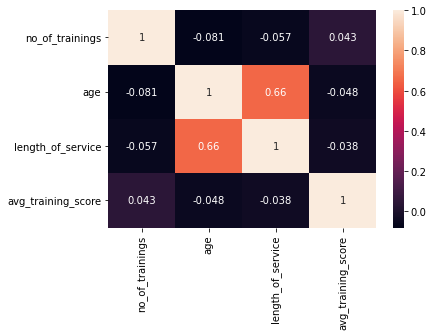

In [49]:
sns.heatmap(hrtrain[['no_of_trainings','age','length_of_service',
        'avg_training_score']].corr(),annot=True)

In [50]:
# Data Aggregation or Wranggling - groupby()
# What is the Average avg_training_score of is_promoted 0 & 1?
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()
# Left side of groupby must be numerical
# right side of groupby within brackets must be categorical
# Statistical function like mean,median,std, skew, kurt, must be
# specified

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [51]:
# What is the Average length_of_service of is_promoted 0 and 1?
hrtrain.length_of_service.groupby(hrtrain.is_promoted).mean()

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64

In [52]:
# What is the Average avg_training_score of awards_won? 0 & 1 ?
hrtrain.avg_training_score.groupby(hrtrain['awards_won?']).mean()

awards_won?
0    63.238186
1    69.649606
Name: avg_training_score, dtype: float64

In [53]:
hrtrain.avg_training_score.groupby([hrtrain['awards_won?'],
                                   hrtrain['KPIs_met >80%']]).mean()

awards_won?  KPIs_met >80%
0            0                62.507213
             1                64.626963
1            0                71.126984
             1                68.863691
Name: avg_training_score, dtype: float64

In [54]:
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
bins                       0
servicebins                0
dtype: int64

In [55]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [56]:
# Reimport train data as the earlier data had new variables
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [57]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [58]:
print(hrtrain.shape)
print(hrtest.shape)

(54808, 14)
(23490, 13)


In [59]:
hrtest['is_promoted']='test' # Add Dependent Variable to test data for Row Concatenation

In [60]:
combinedf=pd.concat([hrtrain,hrtest],axis=0) # Row wise concatenation

In [61]:
combinedf.shape # 78298 observtions with 14 variables

(78298, 14)

In [62]:
combinedf.education.value_counts(dropna=False) # Frequency counts

Bachelor's          52247
Master's & above    21429
NaN                  3443
Below Secondary      1179
Name: education, dtype: int64

In [63]:
3443/78298

0.04397302613093566

In [64]:
# Impute Missing values in education variable with "Bachelor's". NA's are only 4.4% and 
# already "Bachelor's" is very large segment, there will no effect on data pattern/trend
combinedf.education=combinedf.education.fillna("Bachelor's")

In [65]:
combinedf.previous_year_rating.value_counts(dropna=False)

3.0    26539
5.0    16838
4.0    14126
1.0     8903
2.0     5956
NaN     5936
Name: previous_year_rating, dtype: int64

In [66]:
# Impute with 3.0 rating as it is the largest segment and missing values are few
combinedf.previous_year_rating=combinedf.previous_year_rating.fillna(3.0)

In [67]:
# For Dummy Encoding or Label Encoding - Split data into numeric and object columns
numericcols=combinedf.select_dtypes(include=np.number) # np.number-float64 & int64
objectcols=combinedf.select_dtypes(include=['object']) # object columns

In [68]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 8)
(78298, 6)


In [69]:
 # All Numeric data will not be numeric. They might be representing
# categories. previous_year_rating(1-5),KPIs_met >80% & awards_won? - 0 (No)& 1(Yes)

In [70]:
numericcols['KPIs_met >80%'].value_counts()

0    50578
1    27720
Name: KPIs_met >80%, dtype: int64

In [71]:
numericcols['awards_won?'].value_counts()

0    76493
1     1805
Name: awards_won?, dtype: int64

In [72]:
# Add categorical cols from numeric cols to objectcols
objectcols['previous_year_rating']=numericcols.previous_year_rating
objectcols['KPIs_met >80%']=numericcols['KPIs_met >80%']
objectcols['awards_won?']=numericcols['awards_won?']

In [73]:
# Drop Categorical cols from numeric cols
numericcols=numericcols.drop(['previous_year_rating','KPIs_met >80%','awards_won?'],axis=1)
# axis=1 is column dropping

In [74]:
numericcols['is_promoted']=objectcols.is_promoted

In [75]:
objectcols=objectcols.drop('is_promoted',axis=1)

In [76]:
print(numericcols.shape)
print(objectcols.shape)

(78298, 6)
(78298, 8)


In [77]:
objectcols.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,Sales & Marketing,region_7,Master's & above,f,sourcing,5.0,1,0
1,Operations,region_22,Bachelor's,m,other,5.0,0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,3.0,0,0


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
le=LabelEncoder()

In [80]:
objectcolsdummy=objectcols.apply(le.fit_transform)

In [81]:
objectcolsdummy.head(3)

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?
0,7,31,2,0,2,4,1,0
1,4,14,0,1,0,4,0,0
2,7,10,0,1,2,2,0,0


In [82]:
# Concat both dataframe numeric & object into one
combinedf_clean=pd.concat([numericcols,objectcolsdummy],axis=1) # Column wise concatenation

In [83]:
# Split back to traindata and testdata
hrtraindf=combinedf_clean[combinedf_clean.is_promoted!='test']
hrtestdf=combinedf_clean[combinedf_clean.is_promoted=='test']

In [84]:
hrtestdf=hrtestdf.drop('is_promoted',axis=1)

In [85]:
hrtraindf.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [86]:
hrtraindf.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'is_promoted', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

In [87]:
#test null the avg_training_score of is_promooted 0 & 1 equal?
hrtraindf.avg_training_score.groupby(hrtraindf.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [88]:
#since there are exactly 2 levels in categorical vairiable -
# we can do 2 sample independent t test
#null -there is no significance difference in average_training_Score  of is_promoted 0 & 1
#alt -there is significance difference in average_training_Score  of is_promoted 0 & 1

In [89]:
promotedyes= hrtraindf[hrtraindf.is_promoted==1]
promotedno=hrtraindf[hrtraindf.is_promoted==0]

In [90]:
print(promotedyes.shape)
print(promotedno.shape)

(4668, 14)
(50140, 14)


In [91]:
from scipy.stats import ttest_ind
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,equal_var=False)
#since the p value =7.662329172468838e-291 is less than 0.05, reject null

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [92]:
#test null the average length_of_Service of is_promoted 0 & 1 equal?
print(hrtraindf.length_of_service.groupby(hrtraindf.is_promoted).mean())
print(hrtraindf.length_of_service.groupby(hrtraindf.is_promoted).var())

is_promoted
0    5.879398
1    5.716367
Name: length_of_service, dtype: float64
is_promoted
0    18.387278
1    16.062239
Name: length_of_service, dtype: float64


In [93]:
#since there are exactly 2 levels in categorical vairiable -
# we can do 2 sample independent t test
#null -there is no significance difference in average length_of_service  of is_promoted 0 & 1
#alt -there is significance difference in average length_of_service of is_promoted 0 & 1

In [94]:
ttest_ind(promotedyes.length_of_service,promotedno.length_of_service,equal_var=False)
#since the p value =0.008262946987836755 is less than 0.05, reject null

Ttest_indResult(statistic=-2.6420549711884886, pvalue=0.008262946987836755)

In [95]:
#test null the average avg_training_score for different recritment_channel is equal?

In [96]:
print(hrtraindf.avg_training_score.groupby(hrtraindf.recruitment_channel).mean())
print(hrtraindf.avg_training_score.groupby(hrtraindf.recruitment_channel).var())

recruitment_channel
0    63.362839
1    66.182137
2    63.280620
Name: avg_training_score, dtype: float64
recruitment_channel
0    177.989513
1    193.411144
2    178.760475
Name: avg_training_score, dtype: float64


In [97]:
#since there are more than 2 levels in categorical vairiable -
# we can do annova single factor
#null -there is no significance difference in average avg_training_score  of recruitment_channel 0 & 1 & 2
#alt -there is significance difference in average avg_training_score of recruitment_channel 0 & 1 & 2

In [98]:
other=hrtraindf[hrtraindf.recruitment_channel==0]
refer=hrtraindf[hrtraindf.recruitment_channel==1]
source=hrtraindf[hrtraindf.recruitment_channel==2]

In [99]:
from scipy.stats import f_oneway

In [100]:
f_oneway(other.avg_training_score ,refer.avg_training_score ,source.avg_training_score)
#since the pvalue =6.585805990029605e-12 less than 0.05, reject null

F_onewayResult(statistic=25.758203095600134, pvalue=6.585805990029605e-12)

In [101]:
#test null average lenght_of_service of differenct recritment_channels 0,1,2 equal?

In [102]:
print(hrtraindf.length_of_service.groupby(hrtraindf.recruitment_channel).mean())

recruitment_channel
0    5.892991
1    4.979860
2    5.873040
Name: length_of_service, dtype: float64


In [103]:
#since there are more than 2 levels in categorical vairiable -
# we can do annova single factor
#null -there is no significance difference in average length_of_service  of recruitment_channel 0 & 1 & 2
#alt -there is significance difference in average length_of_service of recruitment_channel 0 & 1 & 2

In [104]:
f_oneway(other.length_of_service ,refer.length_of_service ,source.length_of_service)
#since the pvalue =1.0290643395315436e-11 less than 0.05, reject null

F_onewayResult(statistic=25.31146884827052, pvalue=1.0290643395315436e-11)

In [105]:
#test null no asssociation between gender and is_promoted
pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted)

is_promoted,0,1
gender,,
0,14845,1467
1,35295,3201


In [106]:
from scipy.stats import chi2_contingency
#null -there is no relationship between age gender and is_promoted
#alt -there is relationship between age gender and is_promoted

In [107]:
chi2_contingency(pd.crosstab(hrtraindf.gender,hrtraindf.is_promoted))
#since p value is 0.009765091521176657 less than 0.05 reject null

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428,  1389.29382572],
        [35217.29382572,  3278.70617428]]))

In [108]:
hrtraindf.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'is_promoted', 'department', 'region',
       'education', 'gender', 'recruitment_channel', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?'],
      dtype='object')

In [109]:
y=hrtraindf.is_promoted
X=hrtraindf.drop(['employee_id','is_promoted'],axis=1)

In [110]:
X.shape

(54808, 12)

In [111]:
y=le.fit_transform(y) #label encode dependent variable

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logit=LogisticRegression(max_iter=2000)

In [114]:
logitmodel=logit.fit(X,y)

In [115]:
logitmodel.score(X,y) #accuracy from confusion matrix

0.9172201138519924

In [116]:
logitpredict=logitmodel.predict(X)

In [117]:
pd.crosstab(y,logitpredict)

col_0,0,1
row_0,,
0,49948,192
1,4345,323


In [118]:
(49948+325)/(49948+192+4344+323)

0.9172733409965881

In [119]:
from sklearn.metrics import classification_report

In [120]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.12      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [121]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
tree=DecisionTreeClassifier()  

In [123]:
treemodel=tree.fit(X,y)

In [124]:
treemodel.score(X,y) #Accuracy 99.97 - overfitting

0.999744562837542

In [125]:
from sklearn.model_selection import cross_val_score

In [126]:
cross_val_score(tree,X,y,cv=5) #cross validation - repeated testing of the model with same data

array([0.90074804, 0.89107827, 0.8904397 , 0.90128638, 0.89389654])

In [127]:
tree=DecisionTreeClassifier(max_depth=8)

In [128]:
treemodel=tree.fit(X,y)

In [129]:
treemodel.score(X,y) #Accuracy 93 reduced due to max_Depth 

0.9350824697124508

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
cross_val_score(tree,X,y,cv=5) #cross validation - repeated testing of the model with same data

array([0.93340631, 0.93139938, 0.93158183, 0.9338564 , 0.93203175])

In [132]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.5, 0.9, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(0.25, 0.7, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(0.125, 0.5, 'awards_won? <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(0.0625, 0.3, 'previous_year_rating <= 3.5\ngini = 0.058\nsamples = 34907\nvalue = [33862, 1045]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'avg_training_score <= 58.5\ngini = 0.499\nsamples = 388\nvalue = [202, 186]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(0.3125, 0.3, 'awards_won? <= 0.5\ngini = 0.257\nsamples = 18717\nvalue = [15883, 2834]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'department <= 0.5\ngini = 0.492\nsamples = 217\nvalue = [

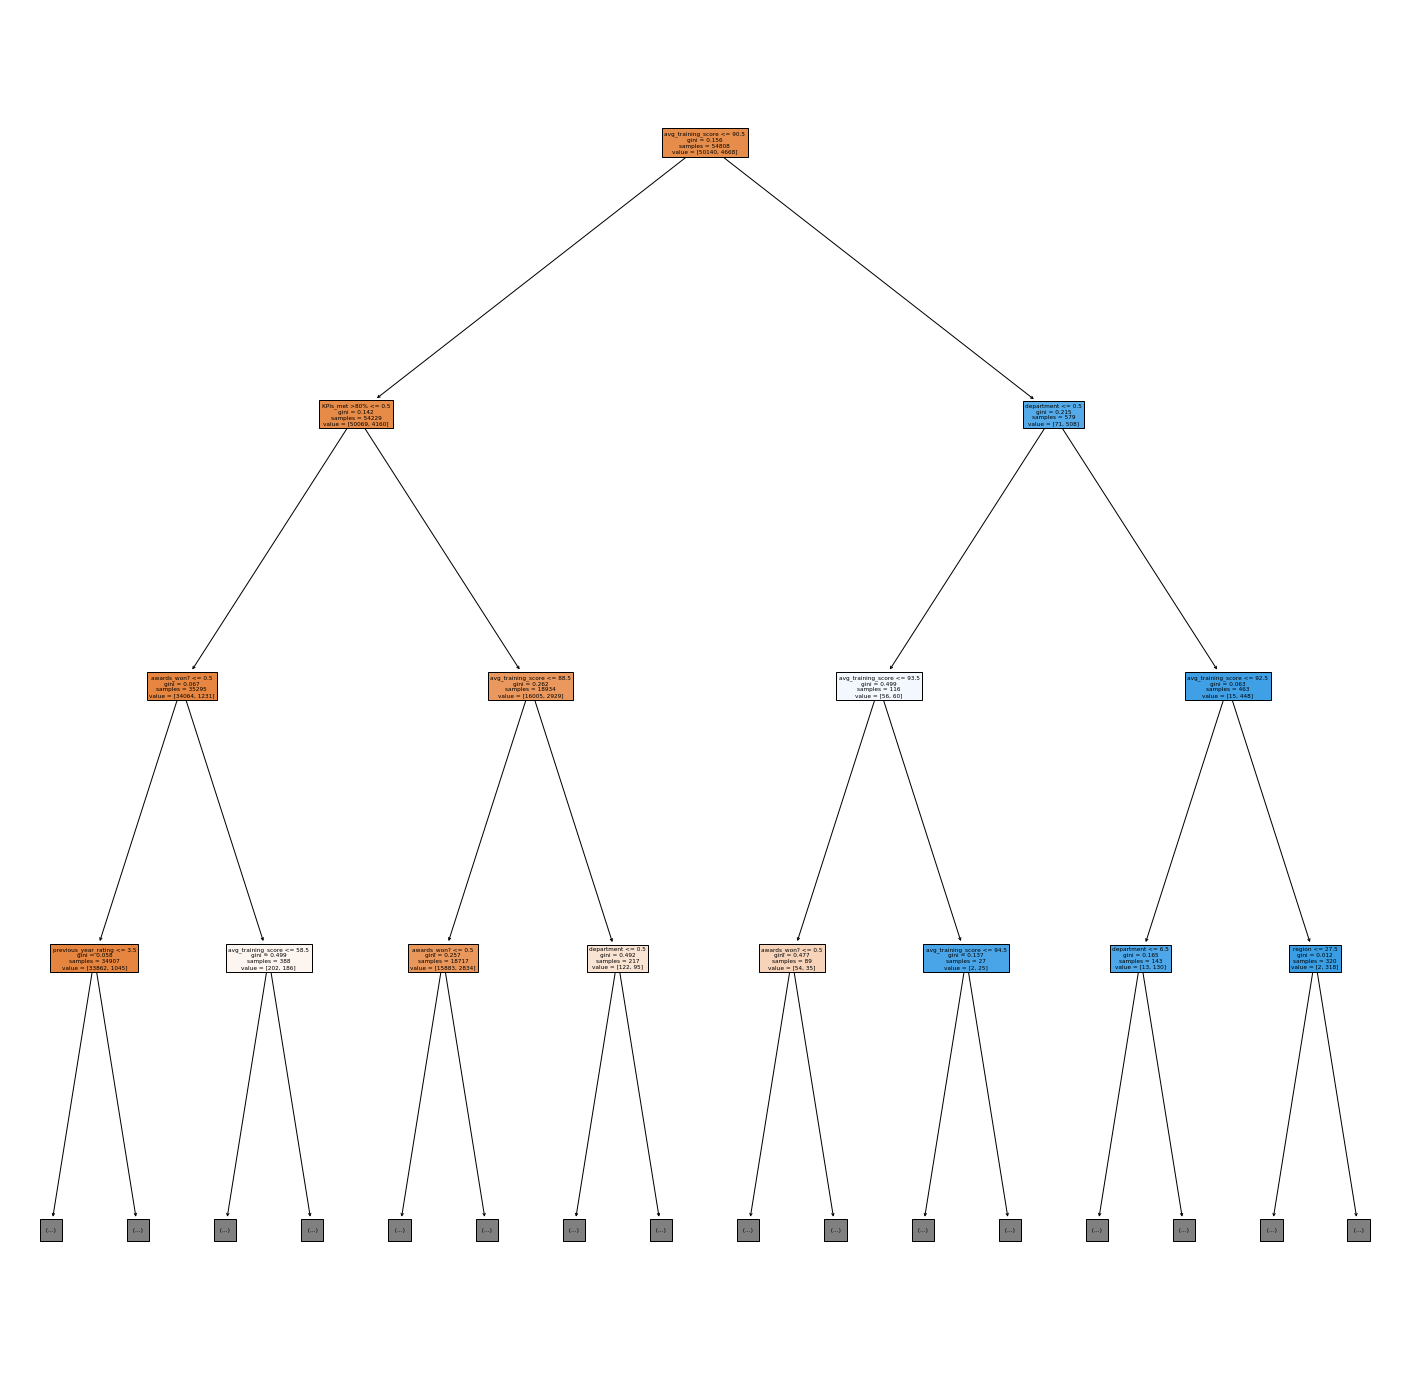

In [133]:
plt.figure(figsize=(25,25))
plot_tree(treemodel,max_depth=3,filled=True,feature_names=X.columns)

In [134]:
pd.DataFrame(X.columns,treemodel.feature_importances_).sort_index(ascending=False)

,0
0.435000,avg_training_score
0.266963,department
0.135236,KPIs_met >80%
0.071425,awards_won?
0.046752,previous_year_rating
0.013091,age
0.011330,length_of_service
0.009321,region
0.005821,no_of_trainings
0.002322,gender


In [135]:
from sklearn.ensemble import RandomForestClassifier 

In [136]:
RF= RandomForestClassifier(n_estimators=1000)

In [137]:
RFmodel=RF.fit(X,y)

In [138]:
RFmodel.score(X,y)

0.999744562837542

In [139]:
cross_val_score(RF,X,y)

array([0.93669038, 0.9322204 , 0.93358876, 0.93613721, 0.93312654])

In [140]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
   
    def recurse(node, path, paths):
       
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
           
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
   
    rules = []
    for path in paths:
        rule = "if "
       
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
       
    return rules

In [141]:
rules = get_rules(tree,X.columns,y)
for r in rules:
    print(r)

if (avg_training_score <= 90.5) and (KPIs_met >80% <= 0.5) and (awards_won? <= 0.5) and (previous_year_rating <= 3.5) and (avg_training_score <= 59.5) and (avg_training_score <= 57.5) and (avg_training_score <= 54.5) then class: 0 (proba: 100.0%) | based on 11,658 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% <= 0.5) and (awards_won? <= 0.5) and (previous_year_rating <= 3.5) and (avg_training_score > 59.5) and (avg_training_score <= 87.5) and (department <= 7.5) and (department <= 6.5) then class: 0 (proba: 97.1%) | based on 10,629 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% > 0.5) and (avg_training_score <= 88.5) and (awards_won? <= 0.5) and (department > 4.5) and (length_of_service <= 7.5) and (previous_year_rating > 1.5) and (age <= 40.5) then class: 0 (proba: 82.7%) | based on 5,799 samples
if (avg_training_score <= 90.5) and (KPIs_met >80% > 0.5) and (avg_training_score <= 88.5) and (awards_won? <= 0.5) and (department <= 4.5) and (region <= 12.5) and (

In [142]:
hrtestdf.columns

Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'avg_training_score', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'previous_year_rating', 'KPIs_met >80%',
       'awards_won?'],
      dtype='object')

In [143]:
hrtestdf=hrtestdf.drop('employee_id',axis=1)

In [144]:
hrlogitpredict=logitmodel.predict(hrtestdf)

In [145]:
hrtestdf.shape

(23490, 12)

In [146]:
pd.DataFrame(hrlogitpredict).to_csv('logistic.csv')

In [147]:
dectreepredict=treemodel.predict(hrtestdf)

In [148]:
pd.DataFrame(dectreepredict).to_csv('dectree.csv')

In [149]:
#decison tree score on competition site :  0.33333

In [150]:
#Randomforest
RFpredict=RFmodel.predict(hrtestdf)

In [151]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

In [152]:
#random forest score on competition site :  0.42314

In [153]:
#lgb
#xgboost

In [154]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [155]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [156]:
gbmmodel=gbm.fit(X,y)

In [157]:
gbmmodel.score(X,y)

0.9449350459786893

In [158]:
gbmpredict=gbmmodel.predict(hrtestdf)

In [159]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')

In [160]:
#gradient bossting(gbm) score : 0.481105

In [161]:
#AV HR ANALYTICS - submission scores
#logistic regression score: 0.11428
#for dicision tree score : 0.33333
#for random forest score : 0.423149
#for Gradient Boosting score : 0.481105
# for xgboost score:  0.4812499
#the best modle is xgboost model coz leaderboard value is 0.54 and our xgboost is close to it 

In [162]:
##  XGBOOST
import xgboost as xgb

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [163]:
xgb_reg=xgb.XGBClassifier(n_estimators=1000)

In [164]:
xgbmodel=xgb_reg.fit(X,y)

C:\Users\ashis\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\ashis\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[10:07:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [165]:
xgbmodel.score(X,y)

0.9904028608962195

In [166]:
xgbpredict=xgbmodel.predict(hrtestdf)

In [167]:
pd.DataFrame(xgbpredict).to_csv('xgb.csv')

In [168]:
#xgboost score:  0.4812499

In [170]:
from sklearn.svm import SVC

In [171]:
svm=SVC(C=0.80) #smaller C value the larger margin hyperplane

In [172]:
svmmodel=svm.fit(X,y)

In [173]:
svmmodel.score(X,y)

0.9148299518318493

In [174]:
svmpredict=svmmodel.predict(hrtestdf)

In [175]:
pd.DataFrame(svmpredict).to_csv('svm.csv')